In [1]:
# imports

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [2]:
# parameters setup

imgs_path = "./style/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # number of most similar images to retrieve

In [3]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
files = [imgs_path + x for x in os.listdir(imgs_path) if ("png" in x or "jpg" in x)]

print("number of images:",len(files))


number of images: 2184


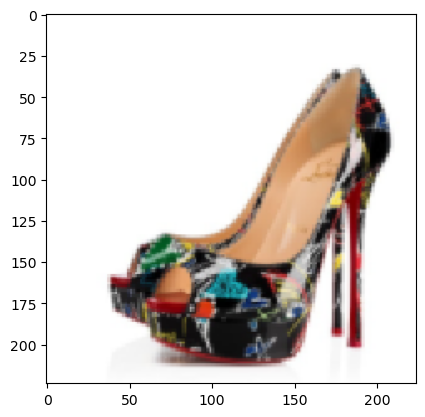

image loaded successfully!


In [5]:
# load an image in PIL format
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [6]:
# convert the PIL image to a numpy array
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [7]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

1/1 [==============================] - 0s 205ms/step
features successfully extracted!
number of image features: 4096


array([[0.        , 0.        , 0.98376477, ..., 1.66377   , 0.        ,
        0.        ]], dtype=float32)

In [8]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())


In [9]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

69/69 [==============================] - 120s 2s/step
features successfully extracted!


(2184, 4096)

In [10]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,./style/0_0_001.png,./style/0_0_002.png,./style/0_0_003.png,./style/0_0_004.png,./style/0_0_005.png,./style/0_0_006.png,./style/0_0_007.png,./style/0_0_008.png,./style/0_0_009.png,./style/0_0_010.png,...,./style/6_9_012.png,./style/6_9_013.png,./style/6_9_014.png,./style/6_9_015.png,./style/6_9_016.png,./style/6_9_017.png,./style/6_9_018.png,./style/6_9_019.png,./style/6_9_020.png,./style/6_9_021.png
./style/0_0_001.png,1.000000,0.554047,0.558606,0.569193,0.521644,0.592031,0.503121,0.587526,0.352372,0.402142,...,0.301020,0.259099,0.247524,0.354853,0.276685,0.399439,0.215223,0.263318,0.362413,0.295160
./style/0_0_002.png,0.554047,1.000000,0.352095,0.421485,0.522096,0.451593,0.321059,0.683562,0.364141,0.295505,...,0.285047,0.265274,0.204258,0.326139,0.348535,0.518782,0.210399,0.309710,0.334937,0.271462
./style/0_0_003.png,0.558606,0.352095,1.000000,0.818573,0.382171,0.444806,0.624093,0.450202,0.348380,0.279828,...,0.403518,0.339660,0.243398,0.399831,0.352441,0.292396,0.251002,0.329957,0.379226,0.276617
./style/0_0_004.png,0.569193,0.421485,0.818573,1.000000,0.416590,0.525976,0.636036,0.499584,0.374038,0.305759,...,0.345944,0.351291,0.293232,0.341896,0.342100,0.295175,0.220416,0.323877,0.377279,0.299922
./style/0_0_005.png,0.521644,0.522096,0.382171,0.416590,1.000000,0.473509,0.325196,0.599150,0.506764,0.393804,...,0.254234,0.241989,0.264299,0.371280,0.313445,0.401367,0.157718,0.258876,0.314481,0.281415


In [11]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("****************************************************************************************************")
    print("Original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("****************************************************************************************************")
    print("Similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("Similarity score : ",closest_imgs_scores[i])

****************************************************************************************************
Original product:


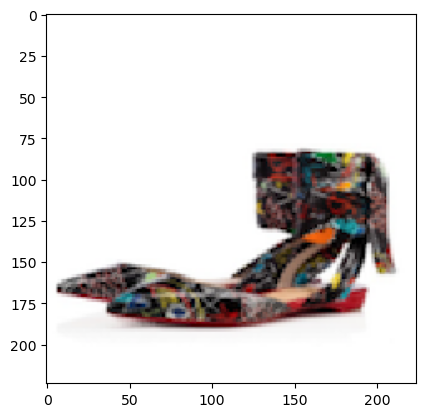

****************************************************************************************************
Similar products:


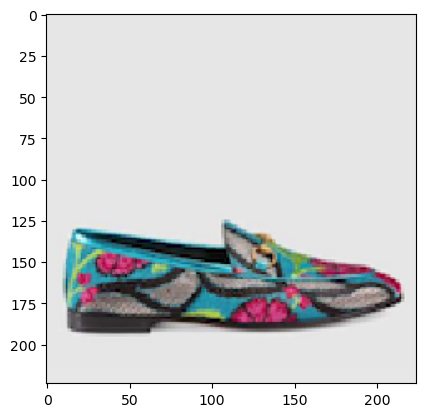

Similarity score :  0.6904617


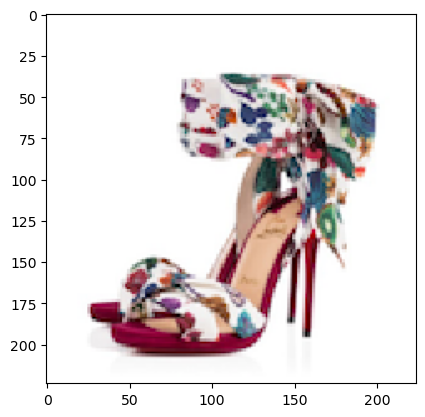

Similarity score :  0.68356204


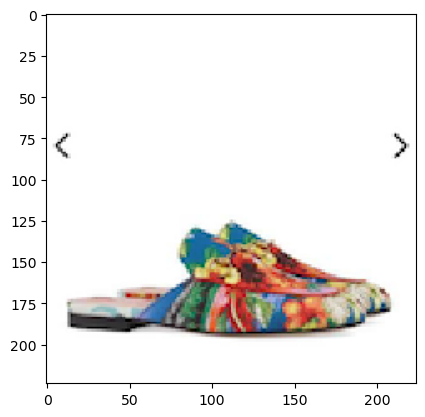

Similarity score :  0.67409563


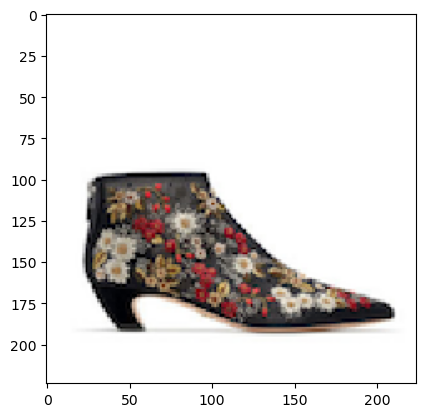

Similarity score :  0.6623858


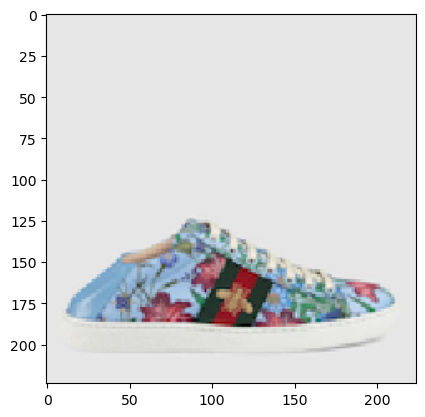

Similarity score :  0.64862007


In [12]:
retrieve_most_similar_products(files[1])

****************************************************************************************************
Original product:


C:\Users\jaysh\AppData\Local\Temp\ipykernel_9156\318139440.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((imgs_model_width, imgs_model_height), Image.ANTIALIAS)


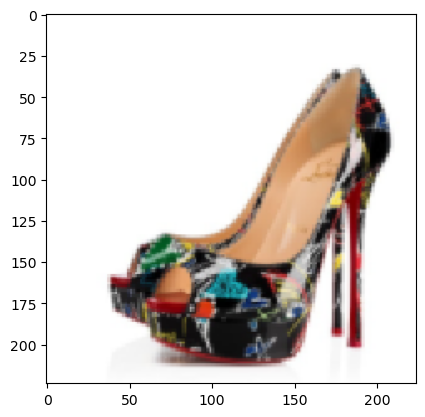

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\jaysh\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3629, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'C:/Users/jaysh/Desktop/DL Project @/style/0_0_001.png'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\jaysh\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\jaysh\AppData\Local\Temp\ipykernel_9156\318139440.py", line 10, in open_image
    display_i

****************************************************************************************************
Similar products:


In [14]:
# Create Tkinter app
app = tk.Tk()
app.title("Image Similarity Finder")

# Function to open a file dialog and get the selected image path
def open_image():
    file_path = filedialog.askopenfilename(initialdir="./style/", title="Select Image",
                                           filetypes=(("Image files", "*.png;*.jpg"), ("all files", "*.*")))
    if file_path:
        display_image(file_path)

# Function to display the selected image in the Tkinter app
def display_image(image_path):
    img = Image.open(image_path)
    img = img.resize((imgs_model_width, imgs_model_height), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    
    panel = tk.Label(app, image=img)
    panel.image = img
    panel.grid(row=1, column=0, padx=10, pady=10)

    retrieve_most_similar_products(image_path)

# Button to open the file dialog
open_button = tk.Button(app, text="Open Image", command=open_image)
open_button.grid(row=0, column=0, padx=10, pady=10)

# Dropdown menu to select images from the list
image_var = tk.StringVar()
image_var.set(files[0])  # Set the default image
image_dropdown = tk.OptionMenu(app, image_var, *files, command=display_image)
image_dropdown.grid(row=0, column=1, padx=10, pady=10)

# Run the Tkinter event loop
app.mainloop()

****************************************************************************************************
Original product:


C:\Users\jaysh\AppData\Local\Temp\ipykernel_9156\3589095924.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((imgs_model_width, imgs_model_height), Image.ANTIALIAS)


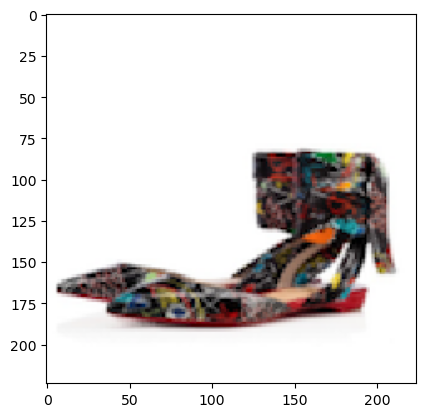

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\jaysh\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3629, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'C:/Users/jaysh/Desktop/DL Project @/style/0_0_002.png'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\jaysh\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\jaysh\AppData\Local\Temp\ipykernel_9156\3589095924.py", line 16, in open_image
    display_

****************************************************************************************************
Similar products:


In [13]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk



# Create Tkinter app
app = tk.Tk()
app.title("Image Similarity Finder")

# Function to open a file dialog and get the selected image path
def open_image():
    file_path = filedialog.askopenfilename(initialdir="./style/", title="Select Image",
                                           filetypes=(("Image files", "*.png;*.jpg"), ("all files", "*.*")))
    if file_path:
        display_image(file_path)

# Function to display the selected image in the Tkinter app
def display_image(image_path):
    img = Image.open(image_path)
    img = img.resize((imgs_model_width, imgs_model_height), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    
    panel = tk.Label(app, image=img)
    panel.image = img
    panel.grid(row=1, column=0, padx=10, pady=10)

    retrieve_most_similar_products(image_path)

# Button to open the file dialog
open_button = tk.Button(app, text="Open Image", command=open_image)
open_button.grid(row=0, column=0, padx=10, pady=10)

# Function to update the displayed image and similar products when a new image is selected
def update_image(event):
    selected_image_path = event.widget.get()
    display_image(selected_image_path)

# Dropdown menu to select images from the list
image_var = tk.StringVar()
image_var.set(files[0])  # Set the default image
image_dropdown = tk.OptionMenu(app, image_var, *files, command=update_image)
image_dropdown.grid(row=0, column=1, padx=10, pady=10)

# Run the Tkinter event loop
app.mainloop()
